In [1]:
from astropy.table import Table, Column
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import pairplot, kdeplot
# Assuming you have located the table fits file in the same directory 
tab = Table.read('DR16Q_v4.fits')
tab.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'PLATE',
 'MJD',
 'FIBERID',
 'AUTOCLASS_PQN',
 'AUTOCLASS_DR14Q',
 'IS_QSO_QN',
 'Z_QN',
 'RANDOM_SELECT',
 'Z_10K',
 'Z_CONF_10K',
 'PIPE_CORR_10K',
 'IS_QSO_10K',
 'THING_ID',
 'Z_VI',
 'Z_CONF',
 'CLASS_PERSON',
 'Z_DR12Q',
 'IS_QSO_DR12Q',
 'Z_DR7Q_SCH',
 'IS_QSO_DR7Q',
 'Z_DR6Q_HW',
 'Z_DR7Q_HW',
 'IS_QSO_FINAL',
 'Z',
 'SOURCE_Z',
 'Z_PIPE',
 'ZWARNING',
 'OBJID',
 'Z_PCA',
 'ZWARN_PCA',
 'DELTACHI2_PCA',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'BOSS_TARGET1',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2'

Parametre to use:
['THING_ID',
 'Z',
 'ZWARNING',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'PLATESN2',
 'PSFFLUX',
 'PSFFLUX_IVAR',
 'psfflux',
 'psffluxERR',
 'EXTINCTION',
 'M_I',
 'SN_MEDIAN_ALL']

In [2]:
# You can check out what is the meaning of each parametr here: 
# https://data.sdss.org/datamodel/files/BOSS_QSO/DR16Q/DR16Q_v4.html

In [3]:
# loading required features 

#  SDSS fluxes 
psfflux = np.array(tab['PSFFLUX'])
Fu = psfflux[:,0]
Fg = psfflux[:,1]
Fr = psfflux[:,2]
Fi = psfflux[:,3]
Fz = psfflux[:,4]

#  SDSS flux inverse variance
psfflux_ivar = tab['PSFFLUX_IVAR']
psfflux_SN = psfflux*psfflux_ivar


# SDSS FLux Signal to Noise -> Flux*(1/Flux_variance)
Fu_SN = psfflux_SN[:,0]
Fu_SN = psfflux_SN[:,0]
Fg_SN = psfflux_SN[:,1]
Fr_SN = psfflux_SN[:,2]
Fi_SN = psfflux_SN[:,3]
Fz_SN = psfflux_SN[:,4]

# WISE fluxes
W1_Flux = tab['W1_FLUX']
W2_Flux = tab['W2_FLUX']

# Wise Flux inverse variance 
W1_Flux_ivar = tab['W1_FLUX_IVAR']
W2_Flux_ivar = tab['W2_FLUX_IVAR']

# WISE FLux Signal to Noise -> Flux*(1/Flux_variance)

W1_SN, W2_SN = W1_Flux*W1_Flux_ivar, W2_Flux*W1_Flux_ivar

#  Other features 
redshift = tab['Z']
zwarning = tab['ZWARNING']


In [79]:
 sum(mask)/len(tab)

0.19266964635521192

In [78]:
e=2
mask = (Fu_SN>e) & (Fg_SN>e) & (Fr_SN>e) & (Fi_SN>e) &(Fz_SN>e) & (redshift>0) & (zwarning==0)    & (W1_SN>e) & (W2_SN>e) 
print(sum(mask))
print(min(redshift[mask]), max(redshift[mask]), np.median(redshift[mask]))

144582
0.004153252579271793 7.011244773864746 1.1326341032981873


In [5]:
#  SDSS-SDSS flux ratios
Fug = np.log(Fu[mask]/Fg[mask])
Fur = np.log(Fu[mask]/Fr[mask])
Fui = np.log(Fu[mask]/Fi[mask])
Fuz = np.log(Fu[mask]/Fz[mask])
Fgr = np.log(Fg[mask]/Fr[mask])
Fgi = np.log(Fg[mask]/Fi[mask])
Fgz = np.log(Fg[mask]/Fz[mask])
Fri = np.log(Fr[mask]/Fi[mask])
Frz = np.log(Fr[mask]/Fz[mask])
Fiz = np.log(Fi[mask]/Fz[mask])

# WISE-WISE flux ratios
FW1W2 = np.log(W1_Flux[mask]/W2_Flux[mask])

# SDSS-WISE flux ratios
FuW1 = np.log(Fu[mask]/W1_Flux[mask])
FuW2 = np.log(Fu[mask]/W2_Flux[mask])
FgW1 = np.log(Fg[mask]/W1_Flux[mask])
FgW2 = np.log(Fg[mask]/W2_Flux[mask])
FrW1 = np.log(Fr[mask]/W1_Flux[mask])
FrW2 = np.log(Fr[mask]/W2_Flux[mask])
FiW1 = np.log(Fi[mask]/W1_Flux[mask])
FiW2 = np.log(Fi[mask]/W2_Flux[mask])
FzW1 = np.log(Fz[mask]/W1_Flux[mask])
FzW2 = np.log(Fz[mask]/W2_Flux[mask])

In [6]:
ID = tab['SDSS_NAME']
ID = ID[mask]
data = np.array(list(zip(Fug, Fur, Fui, Fuz,Fgr,Fgi,Fgz,Fri,Frz,Fiz, FW1W2,FuW1,
                      FgW1, FrW1, FiW1, FzW1, FuW2, FgW2, FrW2, FiW2, FzW2)))
np.savetxt('data.dat',data)
np.savetxt('names.txt', ID, fmt='%s')


In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

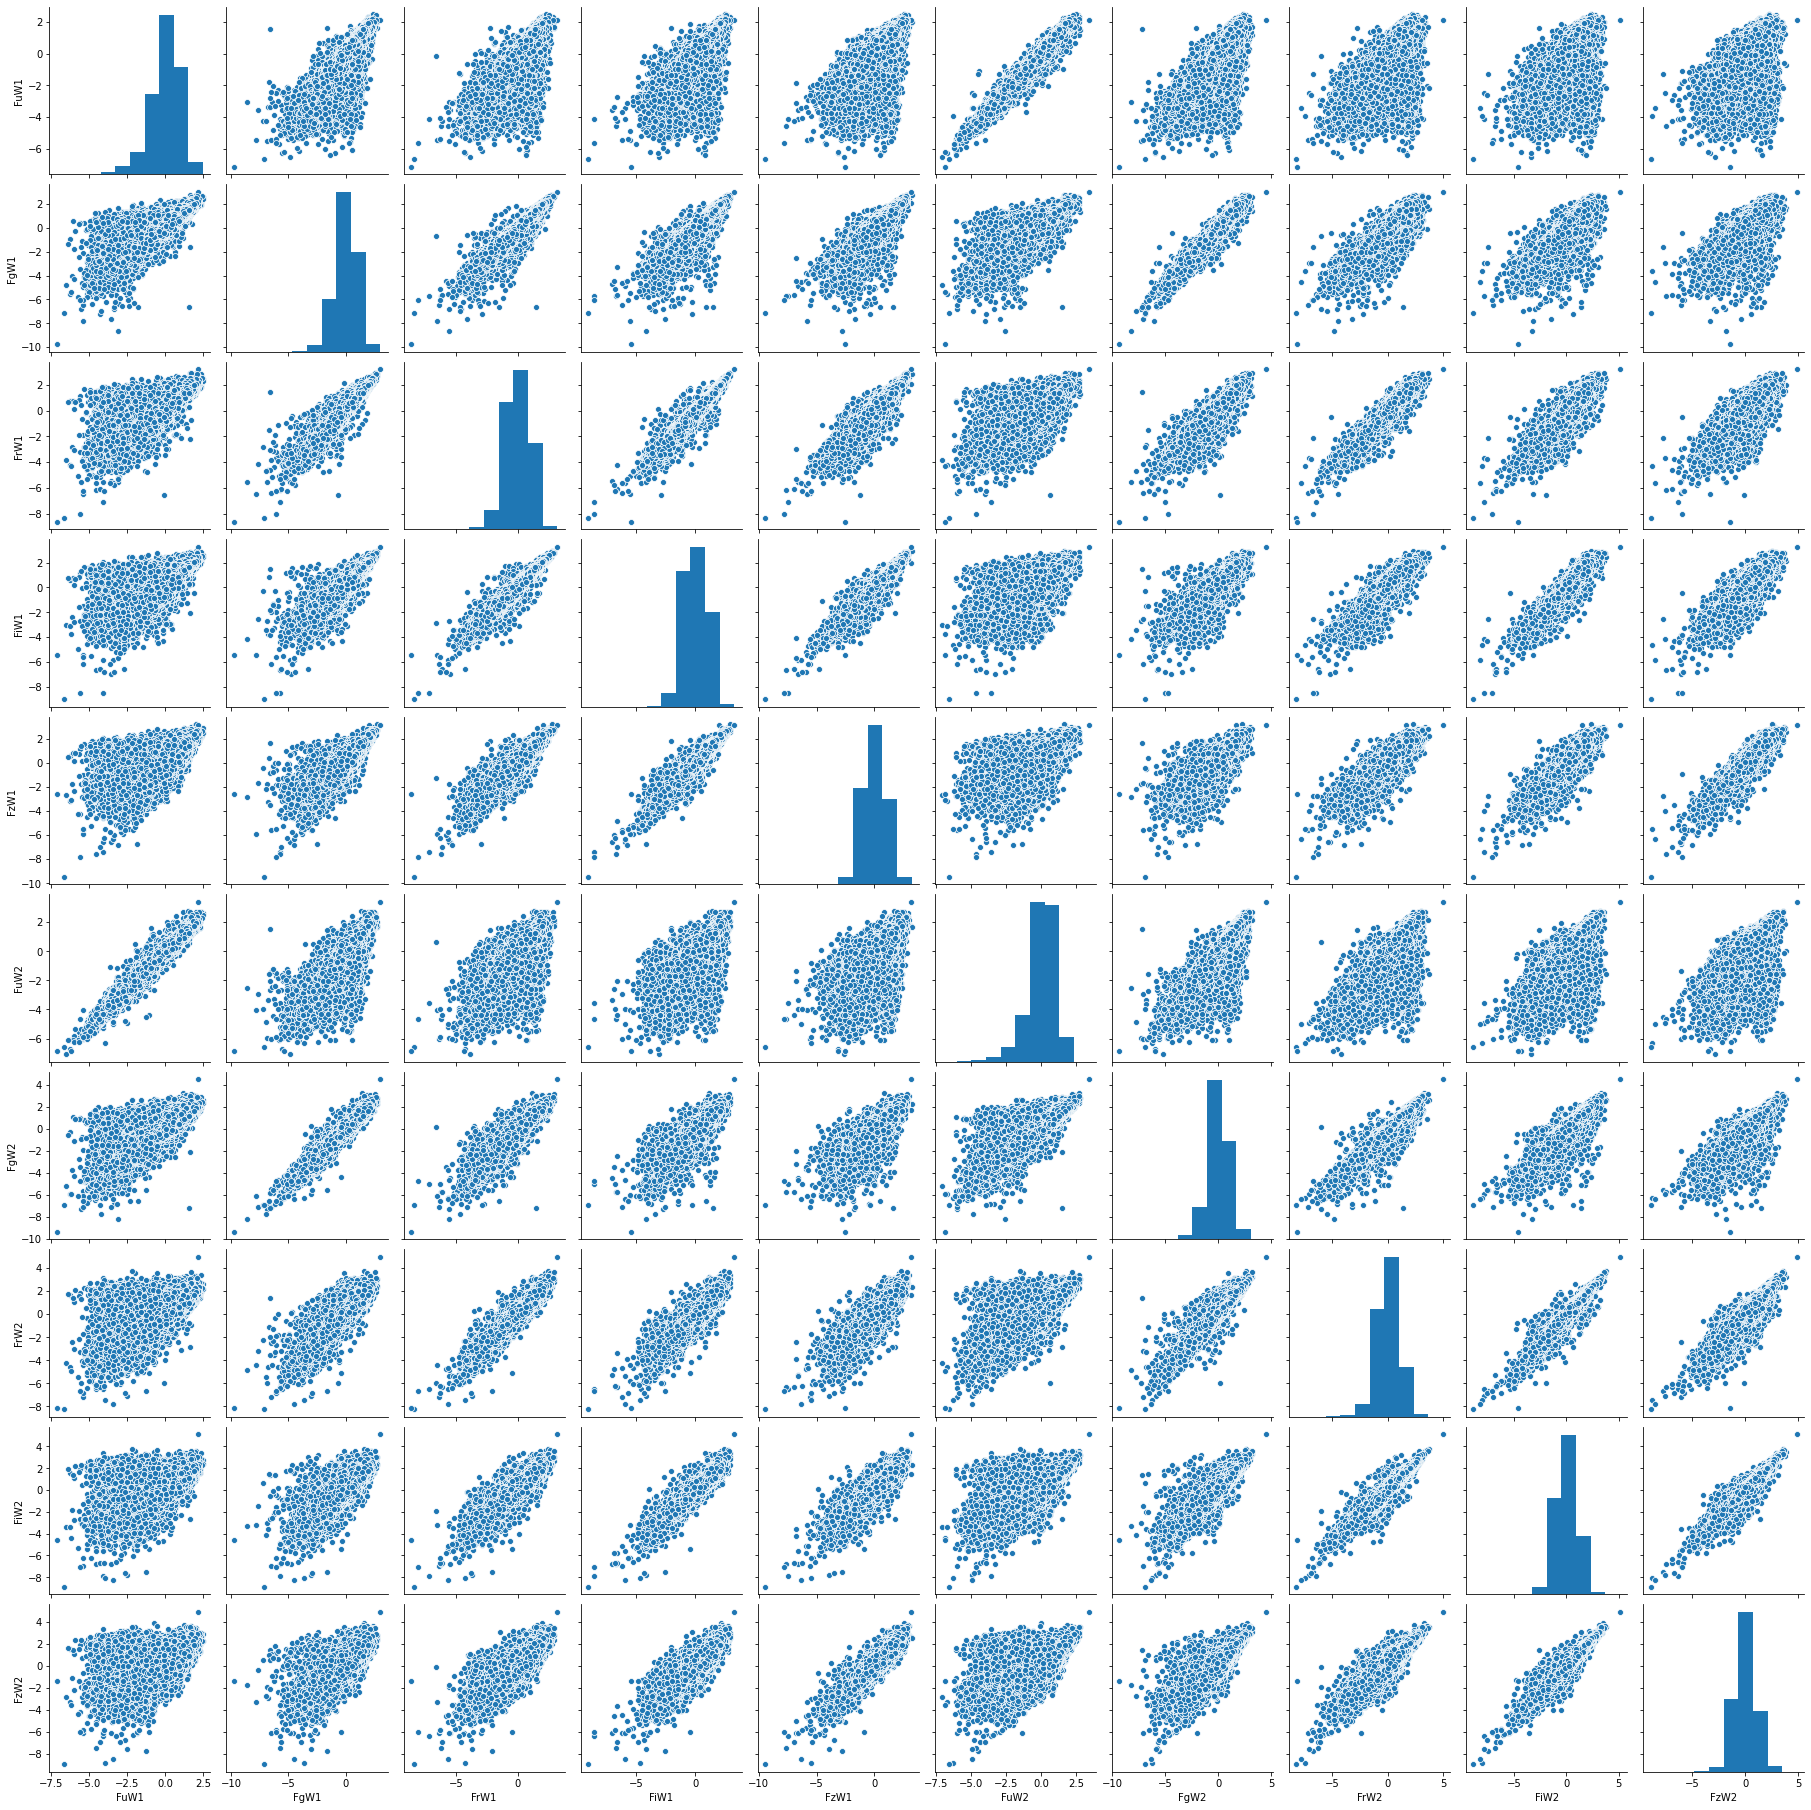

Error in callback <function flush_figures at 0x7f4df4b2dd30> (for post_execute):


KeyboardInterrupt: 

In [62]:
df =savefig.DataFrame(data=data_scaled, columns=['Fug', 'Fur', 'Fui', 'Fuz','Fgr','Fgi','Fgz','Fri','Frz','Fiz', 'FW1W2','FuW1', 'FgW1', 'FrW1', 'FiW1', 'FzW1', 'FuW2', 'FgW2', 'FrW2', 'FiW2', 'FzW2'])
# sns_plot = pairplot(df, vars=['FuW1', 'FgW1','FrW1', 'FiW1', 'FzW1', 'FuW2', 'FgW2','FrW2', 'FiW2', 'FzW2'])
sns_plot = pairplot(df, vars=['FuW1', 'FzW1', 'FgW2','FiW2', 'FzW2'])
sns_plot = pairplot(df, vars=['FuW1', 'FgW1','FrW1', 'FiW1', 'FzW1', 'FuW2', 'FgW2','FrW2', 'FiW2', 'FzW2'])
plt.savefig('10.png')
# sns_plot = pairplot(df)
# sns_plot = pairplot(df, vars=['Fur', 'Fui'])
# sns_plot.savefig('sdss_scaled_plot_kde.png', dpi=1800)
# sns_plot.show()

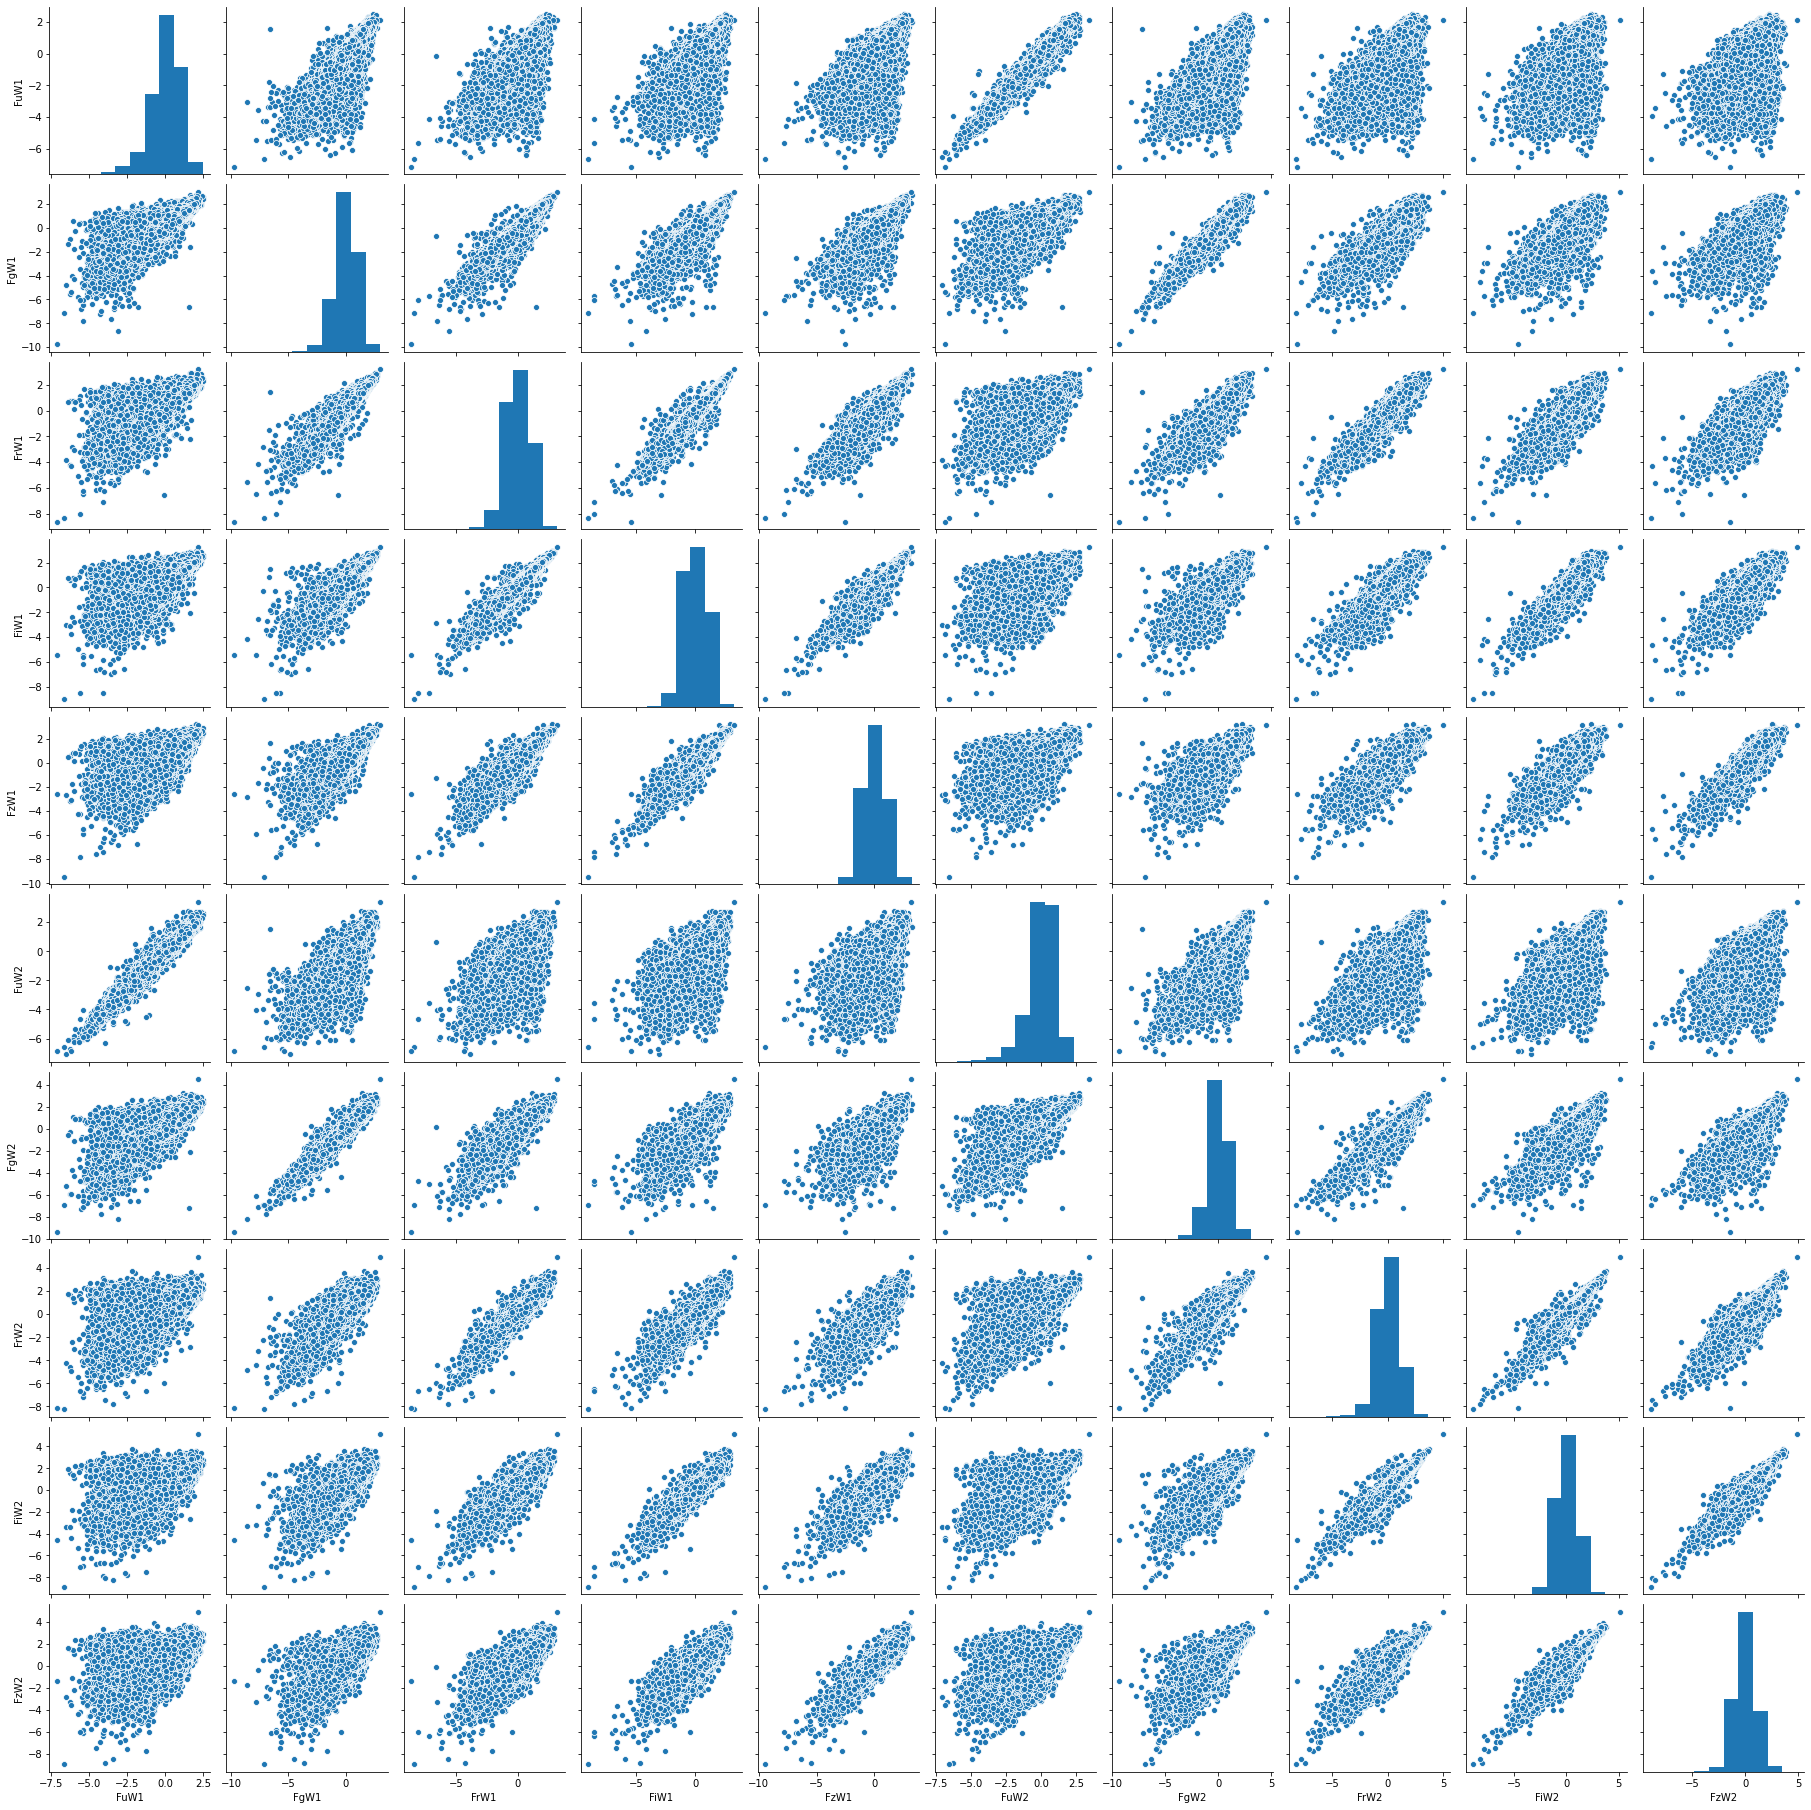

In [64]:
sns_plot = pairplot(df, vars=['FuW1', 'FgW1','FrW1', 'FiW1', 'FzW1', 'FuW2', 'FgW2','FrW2', 'FiW2', 'FzW2'])
plt.savefig('10.png')

In [58]:
from scipy.stats import gaussian_kde
from matplotlib import cm

d = np.array(list(zip(df['FrW2'].values, df['FiW2'].values)))

kde =gaussian_kde(d.T)
bw=1; ngrid=50
kde.set_bandwidth(bw)
# # Contour plot
x, y = d.T
xi, yi = np.mgrid[x.min():x.max():ngrid*1j, y.min():y.max():ngrid*1j]

zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
# zi = np.log(zi)
# zi/=np.max(zi)

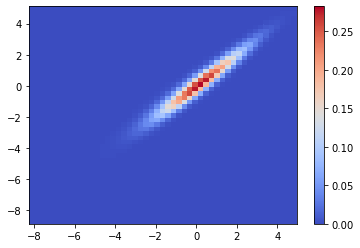

In [59]:
den_plt=plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cm.coolwarm)
cbar= plt.colorbar(den_plt)
# plt.scatter(d[:,0], d[:,1], s=10, c='white', alpha=1)
plt.show()

In [22]:
df['FuW2'].values

array([ 0.36758196,  1.3263324 , -0.46713957, ...,  1.2634836 ,
        0.14865327,  0.84675145], dtype=float32)

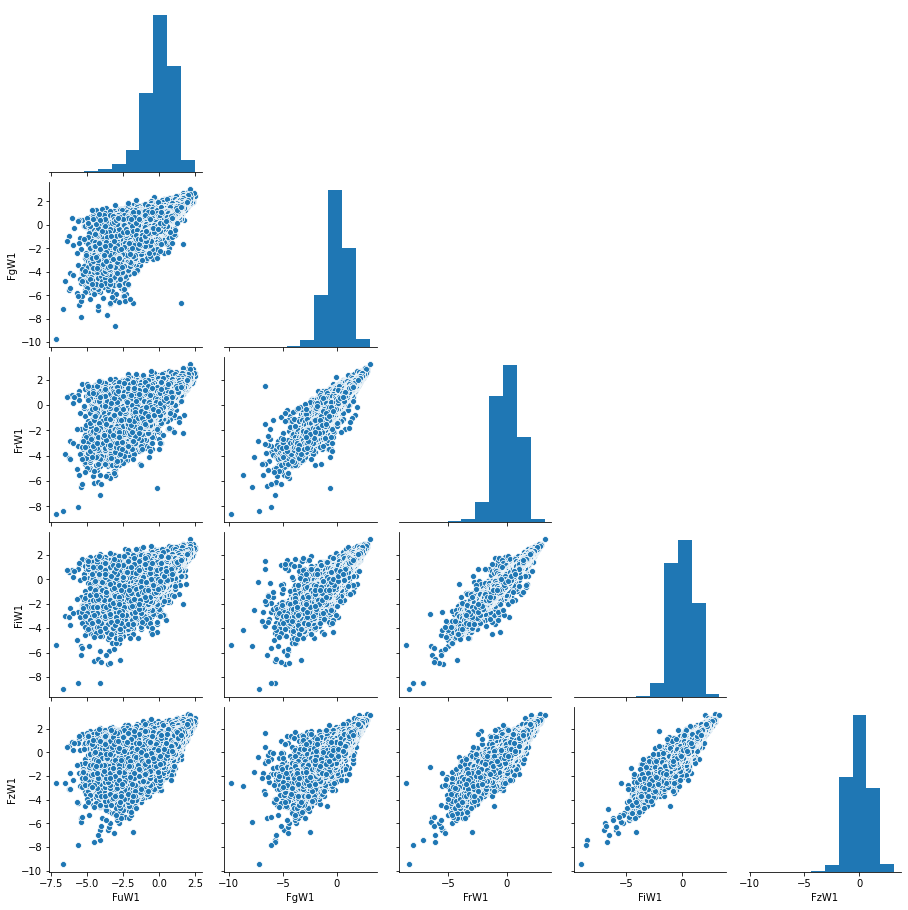

In [14]:
sns_plot = pairplot(df, vars=['FuW1', 'FgW1','FrW1', 'FiW1', 'FzW1'], corner=True)

In [54]:
# import SimpSOM as sps 

# train  =data_scaled
# net = sps.somNet(10, 10, train, PBC=True)
# net.train(0.1, 200)
# net.save('filename_weights')

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


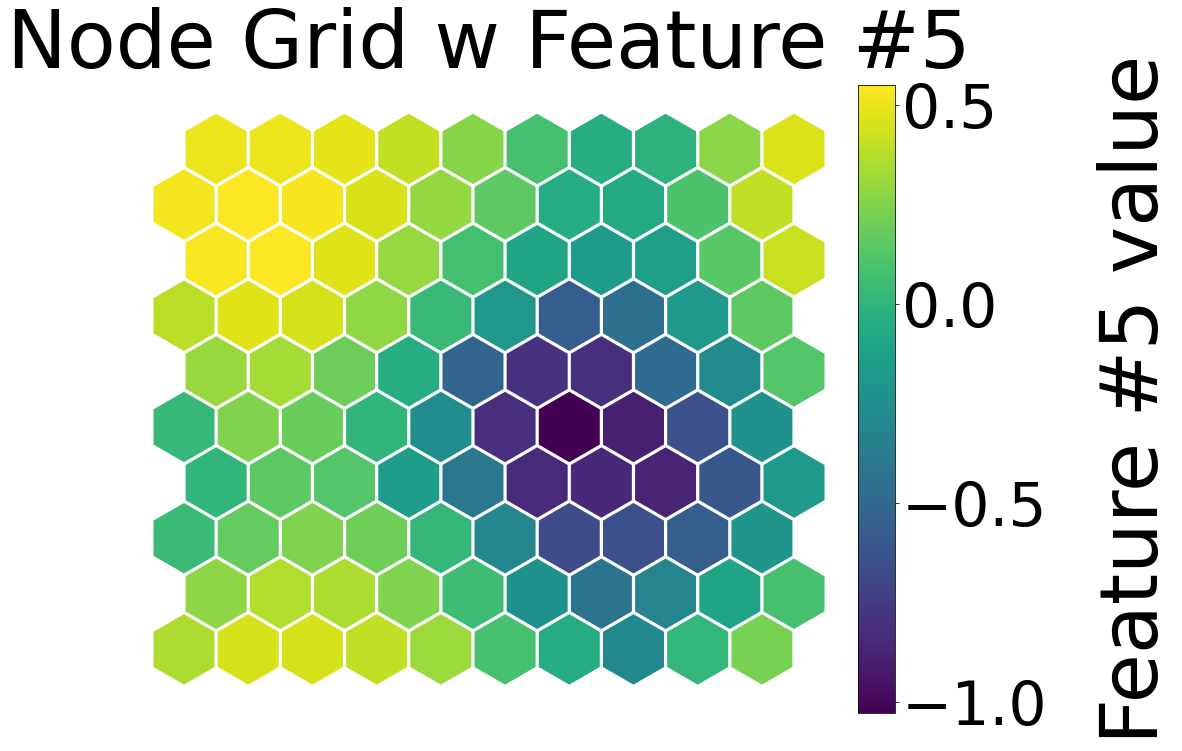

In [55]:
# net.nodes_graph(colnum=5)

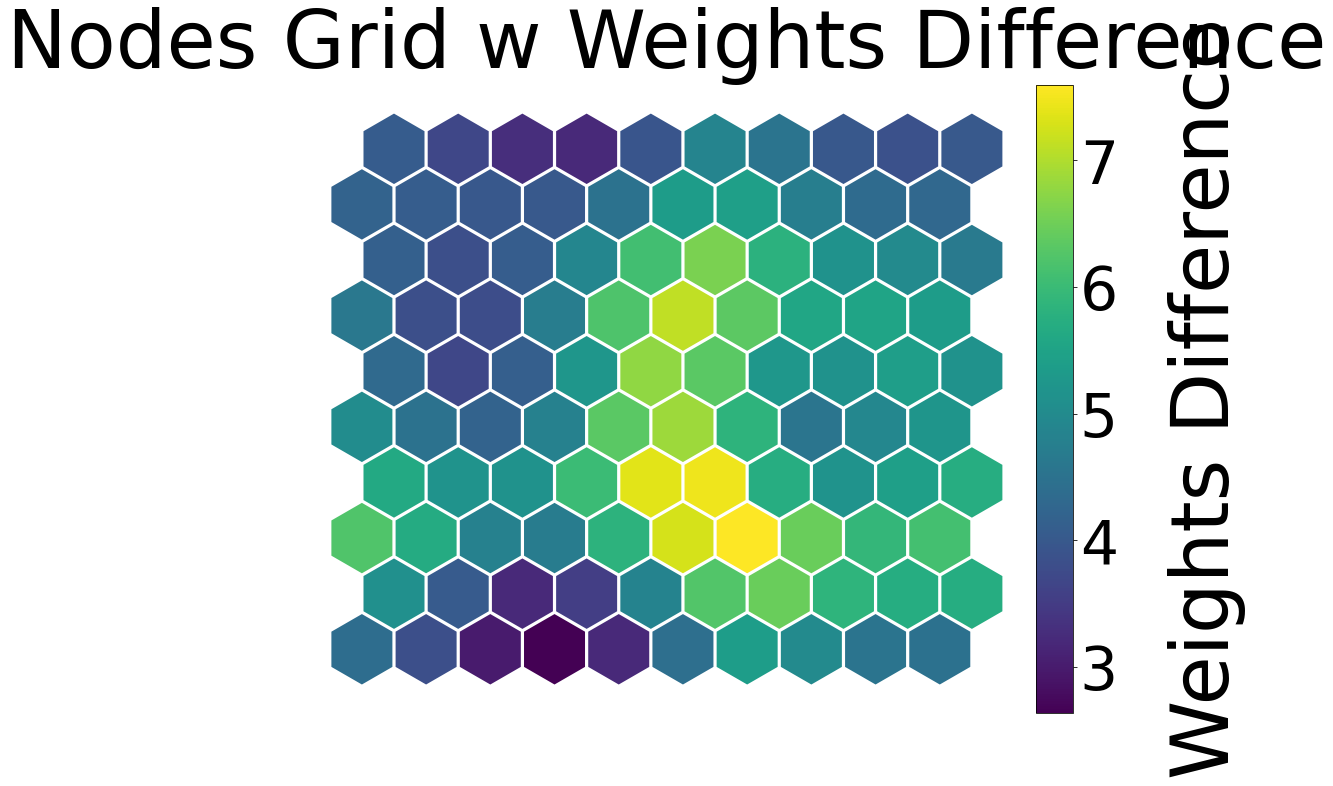

In [56]:
# net.diff_graph()

In [57]:
prj=np.array(net.project(train))

plt.scatter(prj.T[0],prj.T[2])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 432x288 with 0 Axes>